*IMPORTING NECESSARY LIBRARIES*

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score,accuracy_score,roc_auc_score,roc_curve,f1_score,recall_score,confusion_matrix,auc
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

*LOAD DATASET*

In [2]:
X_train=np.load(r"Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")['arr_0']
X_test=np.load(r"Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")['arr_0']
y_train=np.load(r"Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")['arr_0']
y_test=np.load(r"Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")['arr_0']

#checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#converting 3D data into 2D
X_train_flat=X_train.reshape(X_train.shape[0],-1)
X_test_flat=X_test.reshape(X_test.shape[0],-1)

print(type(X_train_flat))
print(X_test_flat.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
(10000, 784)


*CONVERTING DATA FROM NUMPY ARRAY TO DATAFRAME*

In [3]:
X_train = pd.DataFrame(X_train_flat)
X_test = pd.DataFrame(X_test_flat)
y_train = pd.DataFrame(y_train,columns=['target'])
y_test = pd.DataFrame(y_test,columns=['target'])


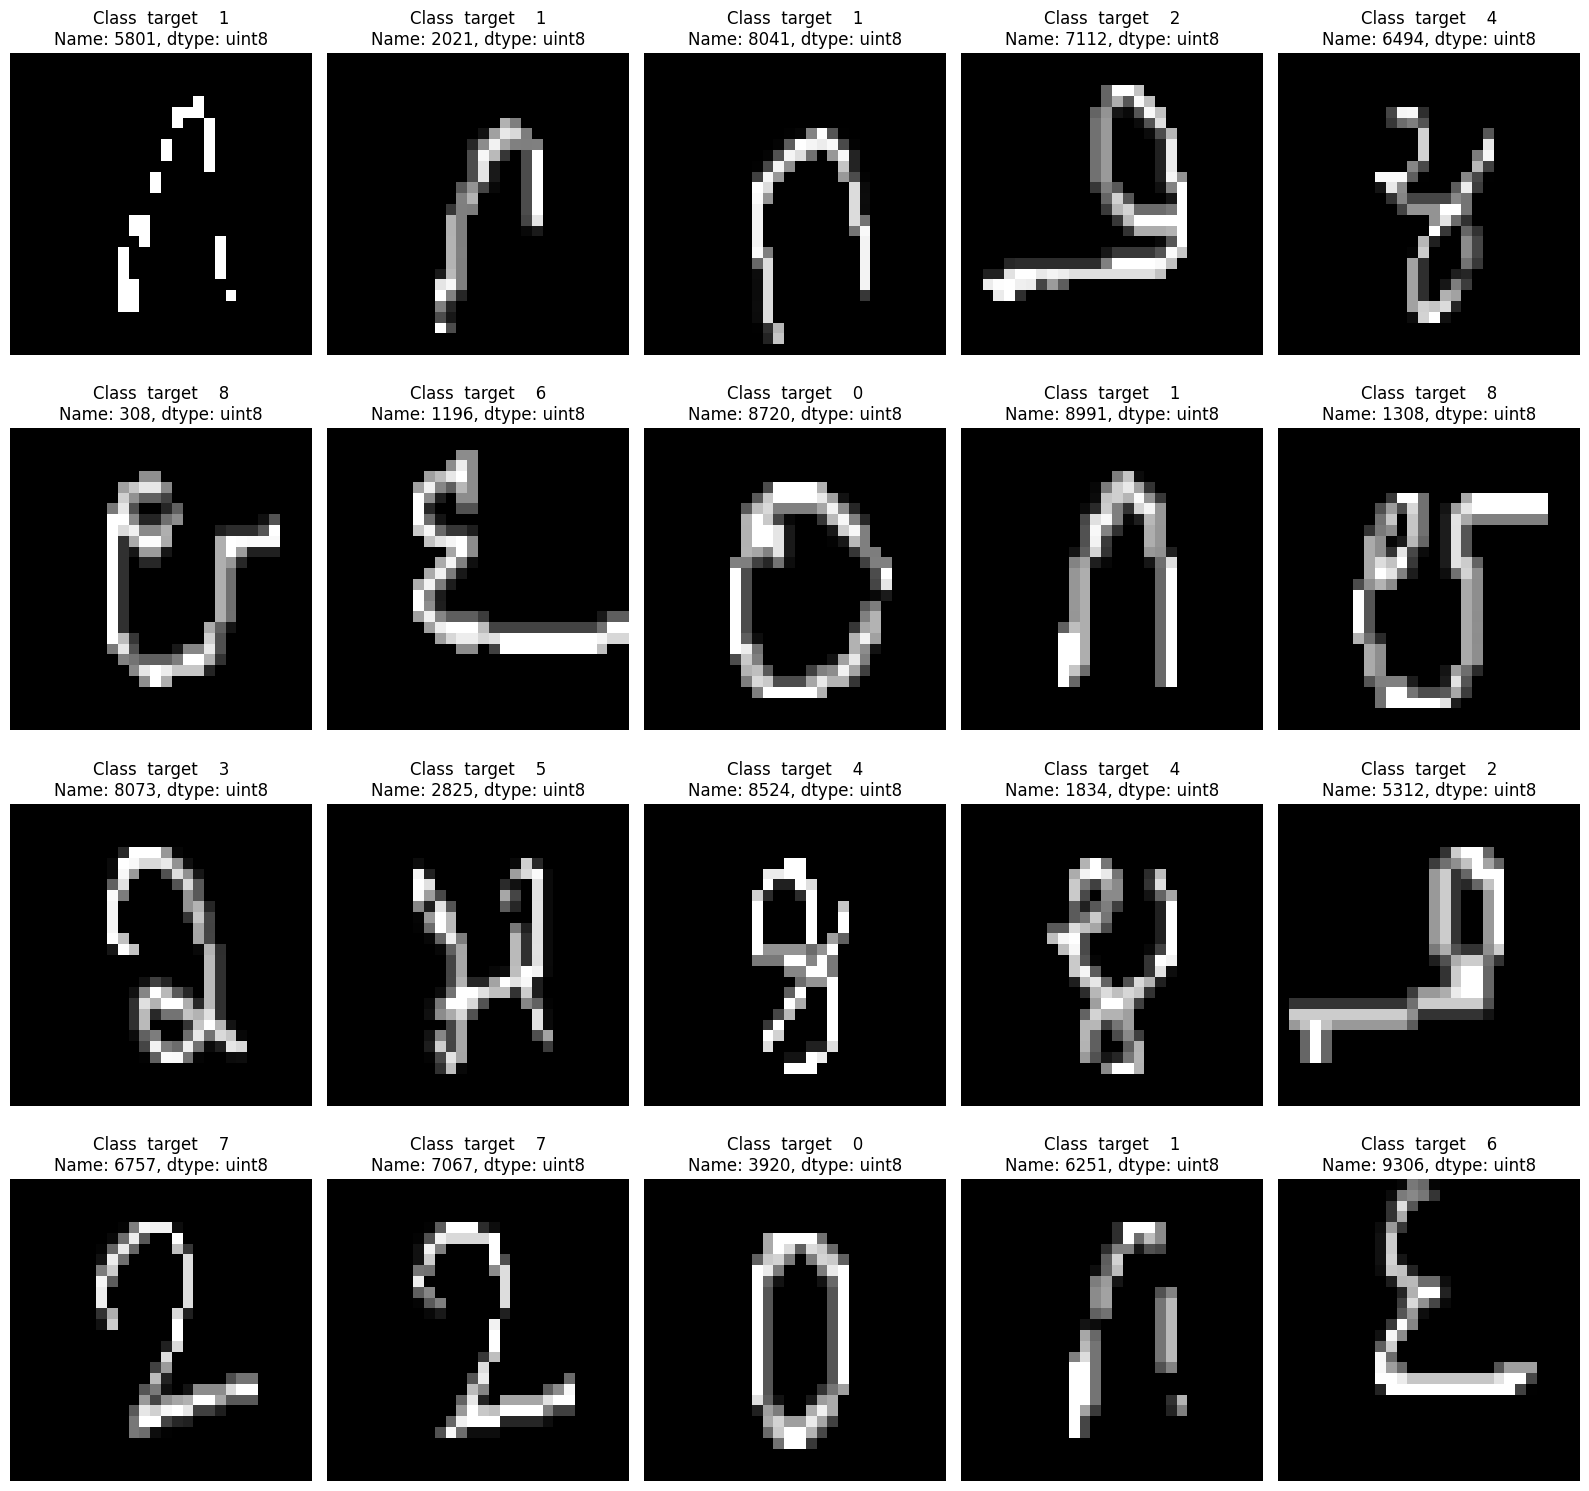

In [4]:
#Visual representation of classes with corresponding images
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,10000,20):
    plt.subplot(4,5,j)
    j=j+1
    plt.imshow(X_train.iloc[i, :].values.reshape(28, 28),cmap="gray") #Reshaping it into  28x28 image
    plt.axis("off")
    plt.title(f"Class  {y_train.iloc[i]}")
    plt.tight_layout()
plt.show()    

*LIST FOR VALUES TO PLOT THE GRAPH*    

In [5]:
#Models with accuracy for different component size
component_size=[10,15]

# Accuracy Score List for Plotting the Graph
accuracy_list_dt=[]
accuracy_list_rf=[]
accuracy_list_nb=[]
accuracy_list_knn=[]
accuracy_list_svc=[]
accuracy_list=[accuracy_list_dt,accuracy_list_rf,accuracy_list_nb,accuracy_list_knn,accuracy_list_svc]


# ROC_AUC_Score List for Plotting the Graph
roc_auc_dt=[]
roc_auc_rf=[]
roc_auc_nb=[]
roc_auc_knn=[]
roc_auc_svc=[]
roc_auc_list=[roc_auc_dt,roc_auc_rf,roc_auc_nb,roc_auc_knn,roc_auc_svc]
def prediction_probability(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    return y_pred_prob

*Principle Component Analysis(PCA) for Dimensionality Reduction and Model Execution*

In [6]:
#Function of PCA
def pca(n_comp,X_train,X_test):
    #standardization
    sc=MinMaxScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    #PCA model
    pca=PCA(n_components=n_comp)
    pca.fit_transform(X_train)
    pca.transform(X_test)
    return X_train,X_test

j=0
for component in component_size:
    X_train,X_test=pca(component,X_train,X_test)
    print(f"----------------------------------- COMPONENT SIZE {component} -----------------------------------------")

    #Function to fit model and Evaluate the model using evaluation metrics
    def eval_metrics(model,X_train,y_train,X_test,y_test):
        #Fitting with the model
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        #Evaluation metrics
        accuracy         =     accuracy_score(y_test, y_pred)
        recall           =     recall_score(y_test, y_pred,average='macro')
        precision        =     precision_score(y_test, y_pred,average='macro')
        f1               =     f1_score(y_test, y_pred,average='macro')
        conf_matrix      =     confusion_matrix(y_test,y_pred)
        roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
        
        return accuracy,precision,f1,recall,conf_matrix, roc_auc
    
    Classifier_list=[DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=8),SVC(kernel="rbf",C=1.0,probability=True)]

    k=0
    for i in Classifier_list:

        #Decision Tree Classifier
        dt_accuracy,dt_precision,dt_f1_score,dt_recall,dt_confusion_matrix,dt_roc_auc =  eval_metrics(i, X_train, y_train, X_test, y_test)
        print()
        print(f"----------{i.__class__.__name__}----------")
        print()   
        print(f"{i.__class__.__name__} Accuracy:", dt_accuracy)
        print(f"{i.__class__.__name__} Precision:", dt_precision)
        print(f"{i.__class__.__name__} F1-score:", dt_f1_score)
        print(f"{i.__class__.__name__} Recall:", dt_recall)
        print(f"{i.__class__.__name__} ROC-AUC:", dt_roc_auc)
        print(f"{i.__class__.__name__} Confusion Matrix:")
        print(dt_confusion_matrix)
        # #Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title("Decision Tree Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        accuracy_list[k].insert(j,dt_accuracy)
        roc_auc_list[k].insert(j,dt_roc_auc)
        k+=1
        print(accuracy_list)
        print(roc_auc_list)
    j+=1



    

----------------------------------- COMPONENT SIZE 10 -----------------------------------------

----------DecisionTreeClassifier----------

DecisionTreeClassifier Accuracy: 0.8026
DecisionTreeClassifier Precision: 0.8017321175578811
DecisionTreeClassifier F1-score: 0.8013796190744176
DecisionTreeClassifier Recall: 0.8026
DecisionTreeClassifier ROC-AUC: 0.8903333333333334
DecisionTreeClassifier Confusion Matrix:
[[820  79  12  30   7   3   8   4  23  14]
 [ 40 911   3   8   8  12   3   3   6   6]
 [  6   4 934  10   5  24   4   9   2   2]
 [ 14   3  15 762  47  41  27  71   3  17]
 [  2   1   4  51 755  79   8  32  21  47]
 [  4   8  10  45 120 708   7  26  24  48]
 [  2   9   9  48  14  30 760  82   6  40]
 [ 33   8   8  59  47  16 130 638   9  52]
 [ 20   6   7  12  13   9   2   3 903  25]
 [ 12  14   4   1  27   8   9  13  77 835]]
[[0.8026], [], [], [], []]
[[0.8903333333333334], [], [], [], []]

----------RandomForestClassifier----------

RandomForestClassifier Accuracy: 0.9258
Ra

  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



----------KNeighborsClassifier----------

KNeighborsClassifier Accuracy: 0.9166
KNeighborsClassifier Precision: 0.921741887468991
KNeighborsClassifier F1-score: 0.9163591670502814
KNeighborsClassifier Recall: 0.9166000000000001
KNeighborsClassifier ROC-AUC: 0.9855020388888889
KNeighborsClassifier Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]
[[0.8026], [0.9258], [0.6258], [0.9166], []]
[[0.8903333333333334], [0.9946369055555555], [0.9109404222222223], [0.9855020388888889], []]


*Accuracy Graph of Different Models*

-------------------------------------------------------------ACCURACY GRAPH-------------------------------------------------------------
[0.8061, 0.8021, 0.8058, 0.8051]


ValueError: x and y must have same first dimension, but have shapes (2,) and (4,)

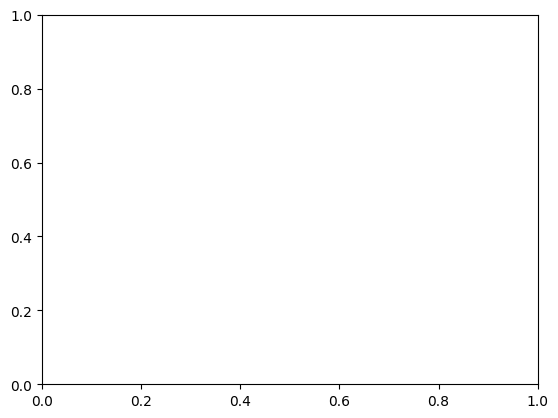

In [ ]:
print("------------------------------------------------------------- ACCURACY GRAPH -------------------------------------------------------------")
model_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER","SUPPORT VECTOR CLASSIFIER"]
for model in  model_list:
    accuracy=accuracy_list[model_list.index(model)]
    print(accuracy)
    plt.plot(component_size,accuracy,label=accuracy,color='red', marker='o')
    plt.title(model)
    plt.xlabel("Components")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

*Plotting ROC_AUC Graph*

In [ ]:
#ROC Curve for different Models with different Component size

model_list=[DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GaussianNB(),KNeighborsClassifier(),SVC(probability=True)]
model_name_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER","SUPPORT VECTOR CLASSIFIER"]
m_index=0 
for model in model_list:    
     y_test_binary = label_binarize(y_test, classes=range(10))
     fpr, tpr,threshold = roc_curve(y_test_binary.ravel(), prediction_probability(model).ravel())
     auc_value= auc(fpr,tpr)
     ra_index=0 
     for component in component_size: 
               plt.plot(  fpr,tpr,label="n_comp={} (AUC={})".format((component),(round(roc_auc_list[m_index][ra_index],3)))   )
               plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
               ra_index+=1
     plt.xlabel('False Positive Rate (FPR)')
     plt.ylabel('True Positive Rate (TPR)')
     plt.title(f'ROC Curve for {model_name_list[m_index]}')
     plt.legend()
     plt.grid(True)
     plt.show()
     m_index+=1